<a href="https://colab.research.google.com/github/RIKI-05/Practicing-ML/blob/main/Salary_Estimation_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salary estimation - K-nearest neighbour model

In [3]:
import pandas as pd
import numpy as np

Choose Dataset from local directory

In [6]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


Load Dataset

In [7]:
dataset = pd.read_csv('/content/salary.csv')
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


Summarize Dataset

In [8]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


Mapping Salary Data to Binary Value

In [11]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K':0, '>50K':1}).astype(int)
print(dataset.head(20))

    age  education.num  capital.gain  hours.per.week  income
0    90              9             0              40       0
1    82              9             0              18       0
2    66             10             0              40       0
3    54              4             0              40       0
4    41             10             0              40       0
5    34              9             0              45       0
6    38              6             0              40       0
7    74             16             0              20       1
8    68              9             0              40       0
9    41             10             0              60       1
10   45             16             0              35       1
11   38             15             0              45       1
12   52             13             0              20       1
13   32             14             0              55       1
14   51             16             0              40       1
15   46             15  

Segregate Dataset into x and y

In [12]:
x = dataset.iloc[:, :-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [13]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

Splitting Dataset into train and test

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=0)

Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

Finding the best K-value

Text(0, 0.5, 'Mean Error')

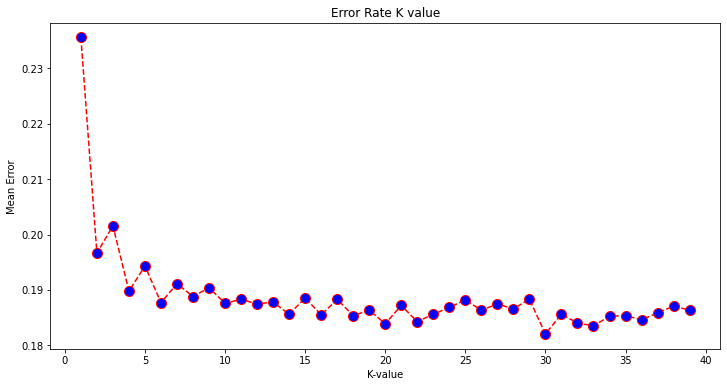

In [34]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  error.append(np.mean(pred != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K-value')
plt.ylabel('Mean Error')


Training

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors= 27, metric = 'minkowski', p = 2) #p=2 for euclidian distance
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=27)

Predicting wheather new customer with Age and Salary will Buy or Not

In [72]:
age = int(input("Enter your Age"))
edu = int(input("Enter your education"))
cg = int(input("Enter the Capital gain"))
wh = int(input("Enter hours/week"))

newemp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newemp))
print(result)

if result==1:
  print("Your salary is above 50k")
else :
  print("Your salary is below 50k")

Enter your Age43
Enter your education10
Enter the Capital gain0
Enter hours/week60
[0]
Your salary is below 50k


Prediction for all test Data

In [70]:
y_pred = model.predict(x_test)

Evaluating Model - confusion matrix

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

print("Accuracy of the model is : {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix
[[5809  384]
 [1142  806]]
Accuracy of the model is : 81.25537403267413%
